In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Preguntas a responder

1. Se ganan mas partidos de visitante o de local?
2. QUe Equipo a logrado la mayor cantidad de puntos tanto en casa como de visitante
3. Cuantos partidos han ganado los distintos equipos estando en casa y visitante.
4. Relacion de la cantidad de puntos anotados a lo largo de los años
5. Contra que equipos se ha ganado mas estando de locales y visitantes.



In [5]:
games = pd.read_csv('games.csv')
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [8]:
games.isnull().sum()

,0
GAME_DATE_EST,0
GAME_ID,0
GAME_STATUS_TEXT,0
HOME_TEAM_ID,0
VISITOR_TEAM_ID,0
SEASON,0
TEAM_ID_home,0
PTS_home,99
FG_PCT_home,99
FT_PCT_home,99


In [9]:
games = games.dropna()

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26552 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26552 non-null  object 
 1   GAME_ID           26552 non-null  int64  
 2   GAME_STATUS_TEXT  26552 non-null  object 
 3   HOME_TEAM_ID      26552 non-null  int64  
 4   VISITOR_TEAM_ID   26552 non-null  int64  
 5   SEASON            26552 non-null  int64  
 6   TEAM_ID_home      26552 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26552 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float64
 17

In [11]:
games.isnull().sum()


,0
GAME_DATE_EST,0
GAME_ID,0
GAME_STATUS_TEXT,0
HOME_TEAM_ID,0
VISITOR_TEAM_ID,0
SEASON,0
TEAM_ID_home,0
PTS_home,0
FG_PCT_home,0
FT_PCT_home,0


In [14]:
games = games[['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away', 'PTS_home', 'PTS_away', 'HOME_TEAM_WINS']]

In [16]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0


In [33]:
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'], errors='coerce')


In [37]:

games[games['GAME_DATE_EST'].isna()]


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS


In [38]:
games['year'] = games['GAME_DATE_EST'].dt.year

In [39]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022


In [40]:
teams  = pd.read_csv('teams.csv')
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [42]:
teams = teams[['TEAM_ID', 'CITY', 'NICKNAME']]
teams.head()

,TEAM_ID,CITY,NICKNAME
0,1610612737,Atlanta,Hawks
1,1610612738,Boston,Celtics
2,1610612740,New Orleans,Pelicans
3,1610612741,Chicago,Bulls
4,1610612742,Dallas,Mavericks


In [44]:
home_games = pd.merge(games, teams, left_on='TEAM_ID_home', right_on='TEAM_ID', how = 'inner')
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-19,22200457,Final,1610612740,1610612749,119.0,128.0,0,2022,1610612740,New Orleans,Pelicans
2,2022-12-11,22200395,Final,1610612740,1610612756,129.0,124.0,1,2022,1610612740,New Orleans,Pelicans
3,2022-12-09,22200384,Final,1610612740,1610612756,128.0,117.0,1,2022,1610612740,New Orleans,Pelicans
4,2022-12-07,22200371,Final,1610612740,1610612765,104.0,98.0,1,2022,1610612740,New Orleans,Pelicans


In [47]:
home_games = home_games.rename(columns={'CITY': 'CITY_home', 'NICKNAME': 'NICKNAME_home'})
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,CITY_home,NICKNAME_home
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-19,22200457,Final,1610612740,1610612749,119.0,128.0,0,2022,1610612740,New Orleans,Pelicans
2,2022-12-11,22200395,Final,1610612740,1610612756,129.0,124.0,1,2022,1610612740,New Orleans,Pelicans
3,2022-12-09,22200384,Final,1610612740,1610612756,128.0,117.0,1,2022,1610612740,New Orleans,Pelicans
4,2022-12-07,22200371,Final,1610612740,1610612765,104.0,98.0,1,2022,1610612740,New Orleans,Pelicans


In [48]:
both_games = pd.merge(home_games, teams, left_on='TEAM_ID_away', right_on='TEAM_ID', how = 'inner')
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID_x,CITY_home,NICKNAME_home,TEAM_ID_y,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-04-13,52100131,Final,1610612740,1610612759,113.0,103.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
2,2022-03-26,22101107,Final,1610612740,1610612759,103.0,107.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
3,2022-02-12,22100848,Final,1610612740,1610612759,114.0,124.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
4,2021-04-24,22000264,Final,1610612740,1610612759,108.0,110.0,0,2021,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs


In [49]:
both_games = both_games.rename(columns={'CITY': 'CITY_away', 'NICKNAME': 'NICKNAME_away'})
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID_x,CITY_home,NICKNAME_home,TEAM_ID_y,CITY_away,NICKNAME_away
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-04-13,52100131,Final,1610612740,1610612759,113.0,103.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
2,2022-03-26,22101107,Final,1610612740,1610612759,103.0,107.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
3,2022-02-12,22100848,Final,1610612740,1610612759,114.0,124.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
4,2021-04-24,22000264,Final,1610612740,1610612759,108.0,110.0,0,2021,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs


In [50]:
both_games = both_games.drop(columns=['TEAM_ID_home', 'TEAM_ID_away', 'TEAM_ID_x', 'TEAM_ID_y'])
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,PTS_home,PTS_away,HOME_TEAM_WINS,year,CITY_home,NICKNAME_home,CITY_away,NICKNAME_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs


In [51]:
games = both_games.copy()
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,PTS_home,PTS_away,HOME_TEAM_WINS,year,CITY_home,NICKNAME_home,CITY_away,NICKNAME_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs


In [52]:
games.columns = games.columns.str.lower()
games.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs


In [54]:
games['total_points'] = games['pts_home'] + games['pts_away']
games.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,pts_total,total_points
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0,243.0
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,216.0,216.0
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs,210.0,210.0
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs,238.0,238.0
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs,218.0,218.0


In [55]:
games.nlargest(5, 'total_points')

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,pts_total,total_points
8265,2019-03-01,21800928,Final,161.0,168.0,0,2019,Atlanta,Hawks,Chicago,Bulls,329.0,329.0
1987,2006-12-07,20600271,Final,157.0,161.0,0,2006,Brooklyn,Nets,Phoenix,Suns,318.0,318.0
10661,2019-10-30,21900061,Final,158.0,159.0,0,2019,Washington,Wizards,Houston,Rockets,317.0,317.0
832,2022-02-25,22100899,Final,153.0,157.0,0,2022,Washington,Wizards,San Antonio,Spurs,310.0,310.0
10534,2020-07-31,21901238,Final,149.0,153.0,0,2020,Dallas,Mavericks,Houston,Rockets,302.0,302.0


In [57]:
games.nsmallest(5, 'total_points')

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,pts_total,total_points
23281,2007-10-19,10700072,Final,36.0,33.0,1,2007,Boston,Celtics,Brooklyn,Nets,69.0,69.0
8648,2003-10-08,10300012,Final,62.0,58.0,1,2003,Indiana,Pacers,Chicago,Bulls,120.0,120.0
10930,2004-11-09,20400049,Final,64.0,60.0,1,2004,Brooklyn,Nets,Portland,Trail Blazers,124.0,124.0
12937,2005-03-13,20400927,Final,64.0,62.0,1,2005,Detroit,Pistons,Utah,Jazz,126.0,126.0
4837,2003-11-01,20300031,Final,73.0,56.0,1,2003,Minnesota,Timberwolves,Toronto,Raptors,129.0,129.0


**Graficos**


In [58]:
total = games['home_team_wins'].value_counts()
print(total)

home_team_wins
1    15645
0    10907
Name: count, dtype: int64


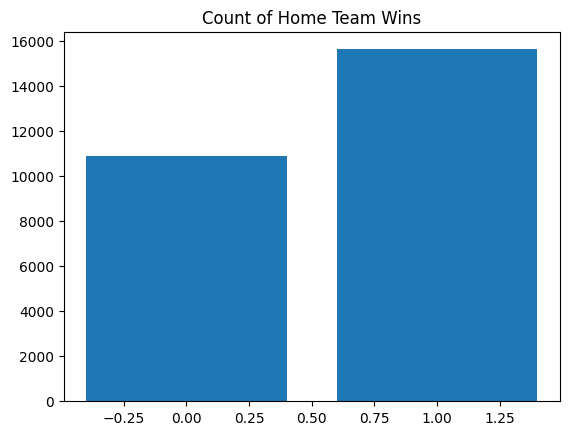

In [60]:
plt.bar(total.index, total.values)

plt.title('Count of Home Team Wins')
plt.show()

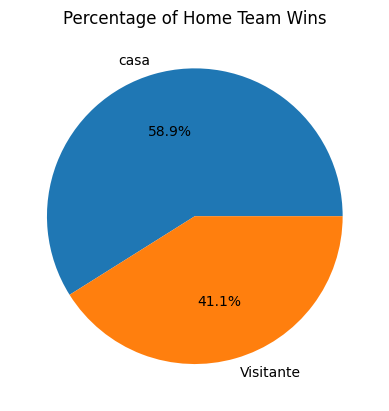

In [62]:
plt.pie(total.values, labels=['casa', 'Visitante'], autopct='%1.1f%%')

plt.title('Percentage of Home Team Wins')
plt.show()

**Cantidad de puntos que anotan cuando juegan en casa o de visitantes **

In [69]:
home_points = games.groupby('nickname_home')['pts_home'].mean().sort_values(ascending=False)
away_points = games.groupby('nickname_away')['pts_away'].mean().sort_values(ascending=False)

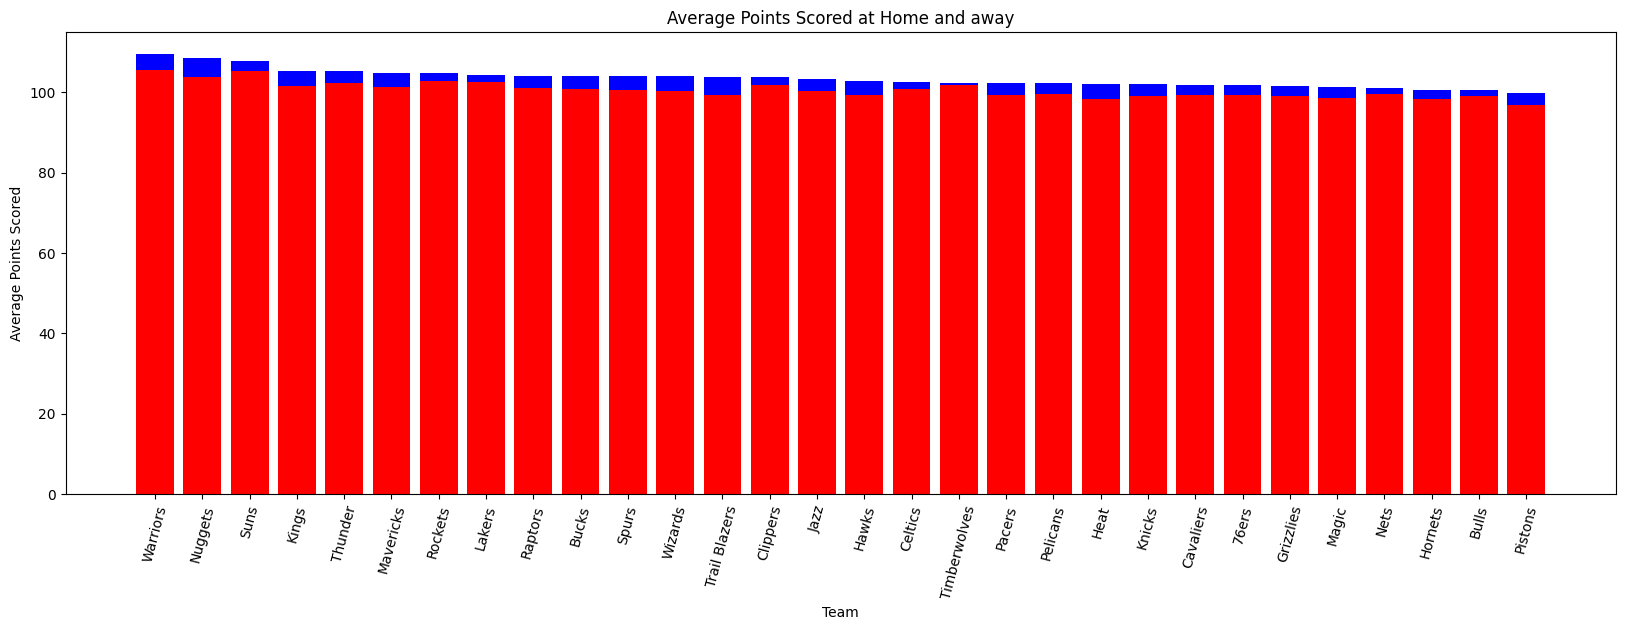

In [77]:
plt.figure(figsize=(20, 6))
plt.bar(home_points.index, home_points.values, color='blue')
plt.bar(away_points.index, away_points.values, color='red')
plt.xticks(rotation=75)
plt.xlabel('Team')
plt.ylabel('Average Points Scored')
plt.title('Average Points Scored at Home and away')
plt.show()

In [104]:
home_wins = games.groupby('nickname_home')['home_team_wins'].sum().sort_values(ascending=False)
away_wins = games.groupby('nickname_away')['home_team_wins'].apply(lambda x: (1 - x).sum()).sort_values(ascending=False)



In [105]:
home_wins.head()

,home_team_wins
nickname_home,
Spurs,685
Heat,632
Warriors,606
Celtics,603
Mavericks,594


In [106]:
away_wins.head()

,home_team_wins
nickname_away,
Spurs,498
Celtics,452
Mavericks,443
Heat,441
Rockets,425


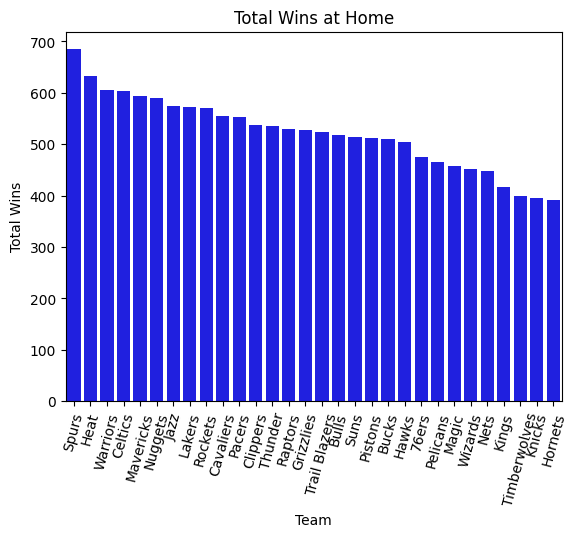

In [107]:
sns.barplot(x=home_wins.index, y=home_wins.values, color='blue')
plt.xticks(rotation=75)
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.title('Total Wins at Home')
plt.show()

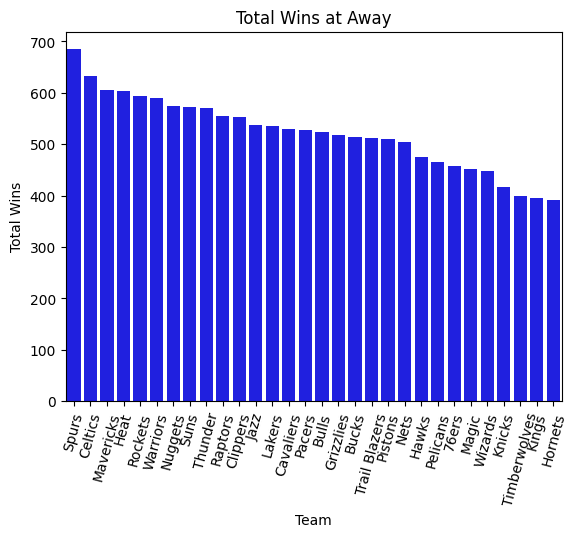

In [108]:
sns.barplot(x=away_wins.index, y=home_wins.values, color='blue')
plt.xticks(rotation=75)
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.title('Total Wins at Away')
plt.show()

In [88]:
Puntos_por_año = games.groupby('year')['total_points'].mean()
Puntos_por_año

,total_points
year,
2003,184.475269
2004,188.379151
2005,193.944251
2006,195.553411
2007,196.871795
2008,198.470180
2009,200.169468
2010,199.734637
2011,197.679781


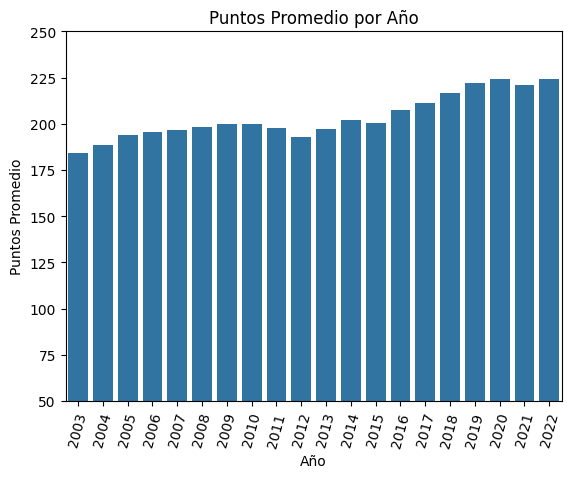

In [94]:
sns.barplot(x=Puntos_por_año.index, y=Puntos_por_año.values)
plt.xlabel('Año')
plt.ylim(50, 250)
plt.xticks(rotation=75)
plt.ylabel('Puntos Promedio')
plt.title('Puntos Promedio por Año')
plt.show()

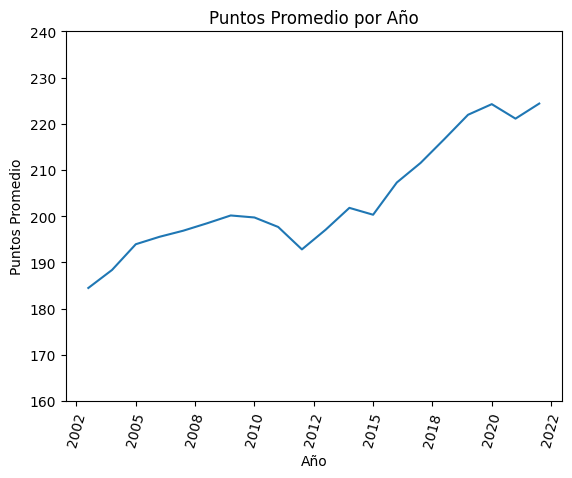

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.lineplot(x=Puntos_por_año.index, y=Puntos_por_año.values)
plt.xlabel('Año')
plt.ylim(160, 240)
plt.xticks(rotation=75)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))  # Format x-axis as integers
plt.ylabel('Puntos Promedio')
plt.title('Puntos Promedio por Año')
plt.show()


In [113]:
games.columns

Index(['game_date_est', 'game_id', 'game_status_text', 'pts_home', 'pts_away',
       'home_team_wins', 'year', 'city_home', 'nickname_home', 'city_away',
       'nickname_away', 'pts_total', 'total_points'],
      dtype='object')

In [116]:
home_wins = games[games['home_team_wins'] == 1]

In [117]:
home_wins.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,pts_total,total_points
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0,243.0
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,216.0,216.0
5,2020-12-27,22000034,Final,98.0,95.0,1,2020,New Orleans,Pelicans,San Antonio,Spurs,193.0,193.0
6,2020-12-27,22000034,Final,98.0,95.0,1,2020,New Orleans,Pelicans,San Antonio,Spurs,193.0,193.0
11,2013-01-07,21200507,Final,95.0,88.0,1,2013,New Orleans,Pelicans,San Antonio,Spurs,183.0,183.0


In [118]:
away_wins  = games[games['home_team_wins'] == 0]

In [119]:
away_wins.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,pts_total,total_points
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs,210.0,210.0
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs,238.0,238.0
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs,218.0,218.0
7,2020-08-09,21901287,Final,113.0,122.0,0,2020,New Orleans,Pelicans,San Antonio,Spurs,235.0,235.0
8,2020-01-22,21900663,Final,117.0,121.0,0,2020,New Orleans,Pelicans,San Antonio,Spurs,238.0,238.0


In [134]:
a = home_wins[['nickname_home','nickname_away']].value_counts()
a.head()

,,count
nickname_home,nickname_away,
Nuggets,Trail Blazers,39
Spurs,Grizzlies,39
Warriors,Trail Blazers,39
Heat,Hawks,39
Lakers,Nuggets,38


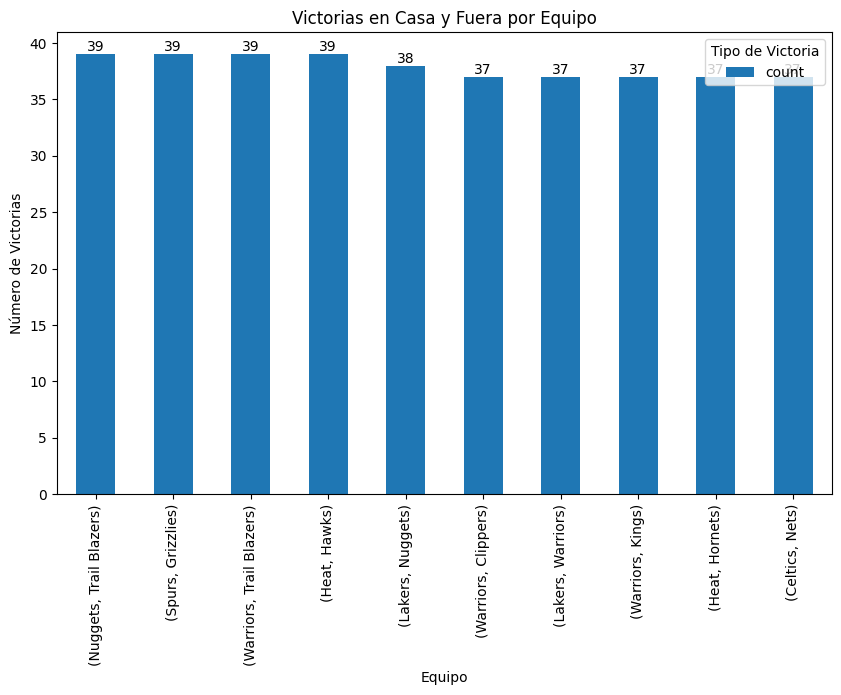

In [139]:
plt.figure(figsize=(10, 6))
a = a.head(10)
ax =a.plot(kind='bar')
plt.title('Victorias en Casa y Fuera por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Número de Victorias')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Victoria')
for container in ax.containers:
    ax.bar_label(container)
plt.show()